# Python-1, Лекция 6



## Модульное программирование и модули

Модульный подход означает, что сложная система разбивается на более мелкие части или компоненты, т.е. модули. Эти компоненты могут быть созданы и протестированы независимо друг от друга. Во многих случаях их можно использовать и в других системах.

Если вы хотите разрабатывать программы, которые были бы удобочитаемыми, надежными и поддерживаемыми без особых усилий, вам необходимо использовать модульный дизайн программного обеспечения. Особенно если ваше приложение имеет значительный размер. Существует множество концепций разработки программного обеспечения в модульной форме. Модульное программирование - это метод разработки программного обеспечения, позволяющий разделить ваш код на отдельные части. Эти части называются модулями. Основное внимание при таком разделении должно уделяться тому, чтобы модули не зависели от других модулей или имели лишь небольшое количество зависимостей. Другими словами, целью является минимизация зависимостей. При создании модульной системы несколько модулей создаются отдельно и более или менее независимо друг от друга. Путем их объединения будет создано исполняемое приложение.

#### Импорт модулей

До сих пор мы не объясняли, что такое модуль Python. В двух словах: ** каждый файл, имеющий расширение .py и состоящий из соответствующего кода на Python, является модулем!** Для превращения такого файла в модуль не требуется специального синтаксиса. Модуль может содержать произвольные объекты, например переменные, функции, классы или атрибуты. Доступ ко всем этим объектам возможен после импорта. Существуют различные способы импорта модулей. Вот пример:

In [1]:
import math

Модуль math включает в себя различные математические функции и константы.
Обратите внимание что доступ осуществляется через пространство имен модуля и точку 

In [3]:
math.pi

3.141592653589793

In [4]:
math.sin(math.pi/2)

1.0

In [5]:
math.cos(math.pi/2)

6.123233995736766e-17

Можно импортировать несколько модулей сразу

In [6]:
import math, random

Команду import можно разместить в любом месте программы. Но хорошим стилем является размещение команды в начале программы
Если вам нужны только некоторые функции из модуля, можно импортировать только их

In [7]:
from math import sin, pi

При этом появляется возможность использовать содержимое модуля напрямую - без указания пространства имен

In [9]:
sin(pi)

1.2246467991473532e-16

При этом другие части модуля не будут доступны

In [10]:
cos(pi)

NameError: name 'cos' is not defined

Вместо импортирования конкретных частей модуля мы можем импортировать все сразу (исключая те части, имена которых начинаются с подчеркивания _ ) через использование звездочки * в команде

In [11]:
from math import *

sin(3.01) + tan(cos(2.1)) + e

2.2968833711382604

Не рекомендуется использовать звездочку в инструкции import, за исключением случаев, когда вы работаете в интерактивной оболочке Python. Одна из причин заключается в том, что происхождение имени может быть довольно неясным, поскольку невозможно определить, из какого модуля оно могло быть импортировано.

In [18]:
from math import *
from numpy import *
print(cos(3))

-0.9899924966004454


In [19]:
# немного модифицируем код
from numpy import *
from math import *
print(cos(3))

-0.9899924966004454


Результат идентичный но может быть разным

In [20]:
from math import *
from numpy import *
print(cos([3,4]))

[-0.9899925  -0.65364362]


In [21]:
# немного модифицируем код
from numpy import *
from math import *
print(cos([3,4]))

TypeError: must be real number, not list

Люди используют звездочку потому что это удобно. Не требуется набирать много символов каждый раз. Но есть и другой способ сокращения имени пространства имен. Хороший пример это модуль numpy. Вы почти нигде не увидите импорт этого модуля в таком стиле:

In [22]:
import numpy

Во всех примерах вы будете видеть вот это:

In [23]:
import numpy as np
np.diag([3, 11, 7, 9])

array([[ 3,  0,  0,  0],
       [ 0, 11,  0,  0],
       [ 0,  0,  7,  0],
       [ 0,  0,  0,  9]])

#### Проектирование и написание модулей

Но как мы создаем модули на Python? Модуль на Python - это просто файл, содержащий определения и инструкции Python. Название модуля сформировано из имени файла путем удаления суффикса .py. Например, если имя файла fibonacci.py, то имя модуля - fibonacci.

Давайте превратим наши функции Фибоначчи в модуль. Практически ничего не нужно делать, мы просто сохраняем следующий код в файле fibonacci.py:

In [24]:
code = '''

def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
def ifib(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
    return a

'''

with open('fibonacci.py', 'w') as handle:
    print(code, file=handle)

!cat fibonacci.py



def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
def ifib(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
    return a




In [25]:
import fibonacci
fibonacci.fib(7)

13

Не пытайтесь вызывать рекурсивную версию функции Фибоначчи с большими аргументами, как мы делали с итеративной версией. Значение, подобное 42, уже слишком велико. Вам придется долго ждать!

Как вы можете легко себе представить, это очень неприятно, если вам приходится часто использовать эти функции в вашей программе, и вам всегда приходится вводить полное имя, т.е. fibonacci.fib(7). Одно из решений состоит в присвоении локального имени функции модуля, чтобы получить более короткое имя:

In [26]:
fib = fibonacci.ifib
fib(10)

55

Но лучше, если вы импортируете необходимые функции непосредственно в свой модуль

#### Подробнее о модулях

Обычно модули содержат функции или классы, но в них также могут быть "простые" инструкции. Эти инструкции можно использовать для инициализации модуля. Они выполняются только при импорте модуля.

Давайте рассмотрим модуль, который состоит всего из одной инструкции:

In [1]:
code = 'print("The module is imported now!")'

with open('one_time.py', 'w') as handle:
    print(code, file=handle)

!cat one_time.py

print("The module is imported now!")


In [2]:
import one_time

The module is imported now!


In [3]:
import one_time

Мы видим, что он был импортирован только один раз. Каждый модуль может быть импортирован только один раз за сеанс интерпретатора или в программе или скрипте. Если вы меняете модуль и хотите его перезагрузить, вам необходимо перезапустить интерпретатор снова. В Python 2.x можно было повторно импортировать модуль, используя встроенную функцию перезагрузки, т.е.reload(имя_модуля). В Python 3.x это больше невозможно

Вам нужно выполнить "import importlib" и использовать importlib.reload(my_module). В качестве альтернативы вы можете использовать "importlib import reload" и использовать reload(my_module).

In [3]:
from importlib import reload
reload(one_time)
print('--------')
reload(one_time)


The module is imported now!
--------
The module is imported now!


<module 'one_time' from '/Users/levich/Documents/Work/HSE_Python_Intro/Python_1_HSE_2023/one_time.py'>

#### Выполнение модулей в виде скриптов

По сути, модуль Python - это скрипт, поэтому его можно запускать как скрипт:

In [4]:
!python one_time.py

The module is imported now!


Модуль, который был запущен как скрипт, будет выполнен так, как если бы он был импортирован, но с одним исключением: имя системной переменной ____name____ имеет значение "____main____". Таким образом, в модуле можно запрограммировать разное поведение для двух случаев. С помощью следующего условного оператора файл можно использовать как модуль или как скрипт, но только в том случае, если он запущен как скрипт, метод fib будет запущен с аргументом командной строки (sys.argv содержит список аргументов командной строки, 0 аргумент - собственное имя файла):

In [6]:
code = '''
def ifib(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
        print(a)
    return a

if __name__ == "__main__":
    import sys
    print(sys.argv)
    ifib(int(sys.argv[1]))
'''

with open('my_module.py', 'w') as handle:
    print(code, file=handle)

!cat my_module.py


def ifib(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
        print(a)
    return a

if __name__ == "__main__":
    import sys
    print(sys.argv)
    ifib(int(sys.argv[1]))



In [7]:
!python my_module.py 50

['my_module.py', '50']
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229
832040
1346269
2178309
3524578
5702887
9227465
14930352
24157817
39088169
63245986
102334155
165580141
267914296
433494437
701408733
1134903170
1836311903
2971215073
4807526976
7778742049
12586269025


#### Виды модулей

Существуют различные типы модулей:

* Модули, написанные на Python 

У них есть суффикс .py
* Динамически подключаемые модули C 

Суффиксы: .dll, .pyd, .so, .sl, ...
* C-модули, связанные с интерпретатором. 

Можно получить полный список этих модулей:

In [8]:
import sys
print(sys.builtin_module_names)

('_abc', '_ast', '_codecs', '_collections', '_functools', '_imp', '_io', '_locale', '_operator', '_signal', '_sre', '_stat', '_string', '_symtable', '_thread', '_tokenize', '_tracemalloc', '_typing', '_warnings', '_weakref', 'atexit', 'builtins', 'errno', 'faulthandler', 'gc', 'itertools', 'marshal', 'posix', 'pwd', 'sys', 'time')


#### Путь поиска модуля

Если вы импортируете модуль, скажем, "import xyz", интерпретатор выполняет поиск этого модуля в следующих местах и в указанном порядке:

* Каталог файла верхнего уровня, то есть исполняемого файла (файла, который вы запустили).
* Каталоги PYTHONPATH, если установлена в вашей ОС такая глобальная переменная среды.
* Стандартный путь установки Linux/Unix, например, в /usr/lib/python3.5.


https://docs.python.org/3/tutorial/modules.html#the-module-search-path


In [9]:
import numpy
numpy.__file__

'/Users/levich/Documents/Work/HSE_Python_Intro/Python_1_HSE_2023/.venv/lib/python3.12/site-packages/numpy/__init__.py'

In [13]:
import os
print(os.environ['PYTHONPATH'])

KeyError: 'PYTHONPATH'

In [10]:
from sys import path
path

['/Library/Frameworks/Python.framework/Versions/3.12/lib/python312.zip',
 '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12',
 '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload',
 '',
 '/Users/levich/Documents/Work/HSE_Python_Intro/Python_1_HSE_2023/.venv/lib/python3.12/site-packages']

#### Содержимое модуля

Используя встроенную функцию dir() и имя модуля в качестве аргумента, вы можете перечислить все допустимые атрибуты и методы для этого модуля.

In [14]:
import math
dir(math)

['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acos',
 'acosh',
 'asin',
 'asinh',
 'atan',
 'atan2',
 'atanh',
 'cbrt',
 'ceil',
 'comb',
 'copysign',
 'cos',
 'cosh',
 'degrees',
 'dist',
 'e',
 'erf',
 'erfc',
 'exp',
 'exp2',
 'expm1',
 'fabs',
 'factorial',
 'floor',
 'fmod',
 'frexp',
 'fsum',
 'gamma',
 'gcd',
 'hypot',
 'inf',
 'isclose',
 'isfinite',
 'isinf',
 'isnan',
 'isqrt',
 'lcm',
 'ldexp',
 'lgamma',
 'log',
 'log10',
 'log1p',
 'log2',
 'modf',
 'nan',
 'nextafter',
 'perm',
 'pi',
 'pow',
 'prod',
 'radians',
 'remainder',
 'sin',
 'sinh',
 'sqrt',
 'sumprod',
 'tan',
 'tanh',
 'tau',
 'trunc',
 'ulp']

При вызове функции dir() без указания аргумента возвращается список с именами в текущей локальной области видимости

Список встроенных функций, исключений и других объектов можно получить, импортировав модуль builtins:

In [15]:
dir()

['In',
 'Out',
 '_',
 '_10',
 '_14',
 '_3',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'code',
 'exit',
 'get_ipython',
 'handle',
 'math',
 'numpy',
 'one_time',
 'open',
 'os',
 'path',
 'quit',
 'reload',
 'sys']

In [16]:
import builtins
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BaseExceptionGroup',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EncodingWarning',
 'EnvironmentError',
 'Exception',
 'ExceptionGroup',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'Runti

# Пакеты

Если вы создали много модулей в какой-то момент времени, вы можете потерять представление о них. У вас могут быть десятки или сотни модулей, и они могут быть разделены на разные категории. Это похоже на ситуацию в файловой системе: вместо того, чтобы хранить все файлы в одном каталоге, вы размещаете их в разных каталогах, упорядочивая их в соответствии с тематикой файлов. Модули Python организованы в пакеты

Пакет - это, по сути, каталог с файлами Python и файлом с именем \_\_init__.py. Это означает, что каждый каталог внутри пути Python, содержащий файл с именем \_\_init__.py, будет рассматриваться Python как пакет. В один пакет можно поместить несколько модулей.

На очень простом примере мы продемонстрируем, как создать пакет с некоторыми модулями Python. Прежде всего, нам нужен каталог. Имя этого каталога будет именем пакета, который мы хотим создать. Мы будем называть наш пакет "simple_package". Этот каталог должен содержать файл с именем __init__.py. Этот файл может быть пустым или содержать корректный код на Python. Этот код будет выполняться при импорте 

In [17]:
code_a = '''
def bar():
    print("Hello, function 'bar' from module 'a' calling")
'''
code_b = '''
def foo():
    print("Hello, function 'foo' from module 'b' calling")
'''

!mkdir pac

with open('pac/a.py', 'w') as handle:
    print(code_a, file=handle)

with open('pac/b.py', 'w') as handle:
    print(code_b, file=handle)

In [18]:
import pac

In [19]:
pac.a.foo()

AttributeError: module 'pac' has no attribute 'a'

Мы видим, что пакет simple_package был загружен, но ни модуль "a", ни модуль "b" не были загружены! Мы можем импортировать модули a и b следующим образом:

In [20]:
from pac import a, b
a.bar()
b.foo()

Hello, function 'bar' from module 'a' calling
Hello, function 'foo' from module 'b' calling


https://napuzba.com/a/import-error-relative-no-parent/p4

https://stackoverflow.com/questions/16981921/relative-imports-in-python-3

## Исключения и обработка ошибок

Вы все, наверное, сталкивались с ошибками (в жизни и не только), но сегодня будем про Python

Давайте на любимом простом примере - деление на ноль:

In [3]:
1 / 0

ZeroDivisionError: division by zero

Когда мы запускаем рабочий код, но что-то идет не так, как хотелось бы, мы часто увидим вот эти названия типа ZeroDivisionError и так далее

Можно даже прочитать и сразу становится понятно:

![](https://memepedia.ru/wp-content/uploads/2022/03/chto-sluchilos-memy.jpg)

Хорошо, получили ошибку, код ничего не сделал, а мы плачем, потому что запускали модель на два дня и потратили все ради того, чтобы программа выдала ошибку (у меня так было...)

Но благо, что в Python можно прямо сказать, что делать при ошибках с помощью try-except!

In [1]:
#не обращаем внимание на код, он мне для мема
from skimage import io
import matplotlib.pyplot as plt

image = io.imread('https://i.pinimg.com/736x/9c/76/33/9c76337b583bf7960ad8075b4caaa774--ohio-buckeyes-state-university.jpg')

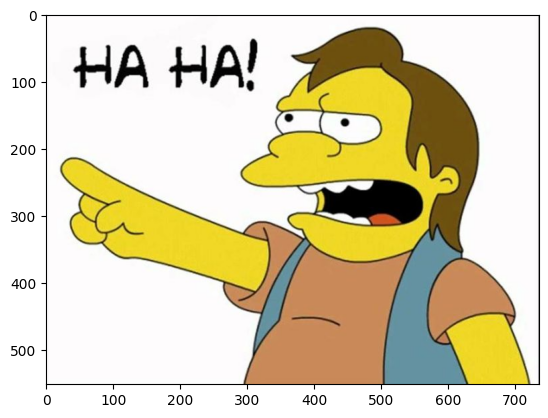

In [2]:
try: # запусти код
    n = int(input("Please enter an integer: "))
    print(1 / n)
except ZeroDivisionError: # если встретил вот эту ошибку (ошибка - это класс)
    plt.imshow(image)
    plt.show()

О! Заметили, что у нас еще бывают другие ошибки? И мы их тоже хотим обработать!

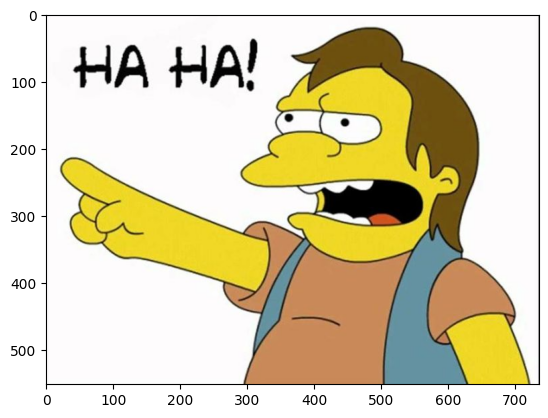

In [3]:
try: # запусти код
    n = int(input("Please enter an integer: "))
    print(1 / n)
except ZeroDivisionError: # если встретил вот эту ошибку (ошибка - это класс)
    plt.imshow(image)
    plt.show()
except ValueError:
    plt.imshow(image)
    plt.show()
except:
    print("Haha")

Но так неудобно, можно объединить

In [ ]:
try: # запусти код
    n = int(input("Please enter an integer: "))
    print(1 / n)
except (ZeroDivisionError, ValueError): # если встретил вот эту ошибку (ошибка - это класс)
    plt.imshow(image)
    plt.show()

Please enter an integer: 5
0.2


Окей, а что если мы вот сделали кусок кода и хотим после обработки ошибки сделать что-нибудь еще? Для этого есть else и finally

* else - выполняет код, если ошибок в итоге не возникло

* finally - выполняет код в любом случае

Please enter an integer: 0


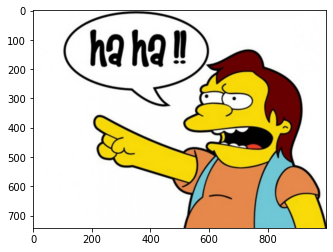

LOL


In [ ]:
try: # запусти код
    n = int(input("Please enter an integer: "))
    print(1 / n)
except (ZeroDivisionError, ValueError): # если встретил вот эту ошибку (ошибка - это класс)
    plt.imshow(image)
    plt.show()
else:
    print("Good job")
finally:
    print("LOL")

А что происходит, если внутри обработки ошибки случаются ошибки? Давайте попробуем:

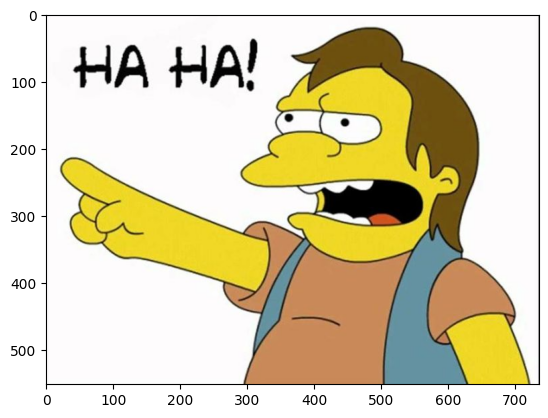

LOL


ValueError: invalid literal for int() with base 10: 'abc'

In [4]:
try: # запусти код
    n = int(input("Please enter an integer: "))
    print(1 / n)
except ZeroDivisionError: # если встретил вот эту ошибку (ошибка - это класс)
    plt.imshow(image)
    plt.show()
    k = int("abc")
except ValueError:
    print("Caught ya")
else:
    print("Good job")
finally:
    print("LOL")

Какие вообще бывают ошибки? Ну давайте посмотрим:

In [5]:
import builtins
dir(builtins) # тут не только ошибки, но вообще все встроенные объекты

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BaseExceptionGroup',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EncodingWarning',
 'EnvironmentError',
 'Exception',
 'ExceptionGroup',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'Runti

А что еще? :)

* Можно создать свое собственное исключение (и его подымать)

* Можно смотреть на значения исключения

У каждого исключения есть еще внутри значения, которые также можно выводить

In [6]:
try: # запусти код
    n = int(input("Please enter an integer: "))
    print(1 / n)
except (ZeroDivisionError, ValueError) as e: # если встретил вот эту ошибку (ошибка - это класс)
    print(e) #внутри находится сообщение с тем, а что случилось-то
finally:
    print("LOL")

division by zero
LOL


In [7]:
try: # запусти код
    n = int(input("Please enter an integer: "))
    print(1 / n)
    raise ZeroDivisionError()
except (ZeroDivisionError, ValueError) as e: # если встретил вот эту ошибку (ошибка - это класс)
    print(e) #внутри находится сообщение с тем, а что случилось-то
finally:
    print("LOL")

division by zero
LOL


In [ ]:
class MyException(Exception): #вообще исключения - это класс, который наследуется от класса Exception (логично, правда?)
    pass #здесь внутри можно сделать обработку, но об этом будет дальше

raise MyException("I can't take it anymore!")

MyException: ignored

In [ ]:
try:
    raise Exception("I can't take it anymore!")
except Exception as e:
    print(e)

I can't take it anymore!


И последнее. Допустим, что мы с вами тестируем какую-нибудь систему и собираем ошибки для того, чтобы потом их исследовать:

In [7]:
a = [1, 0, 0, 5]
exs = []
for i, k in enumerate(a):
    try:
        res = 1 / k
    except Exception as e:
        exs.append(e)

print(exs) #а что, а где..

[ZeroDivisionError('division by zero'), ZeroDivisionError('division by zero')]


Вот по таким ответам непонятно, что случилось. Так вот, для исключений можно добавлять комментарии! (Но только с версии Python 3.11)

In [8]:
!python --version

Python 3.12.6


In [12]:
!pip install python --upgrade

ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


In [17]:
try:
    raise TypeError('bad type')
except Exception as e:
    e.add_note('Add some information')
    e.add_note('Add some more information')
    raise

TypeError: bad type

## Logging

Одна из вещей, которая ходит рядом с обработкой ошибок - это логирование, которое нужно, дабы следить за работой. Ведь если мы даже ошибку обработали, код работает, все славно, сам факт наличия ошибки может нас о чем-нибудь предупредить...

Тем более, что в продовых системах вы не сделаете простой print)

Мы поговорим о встроенной библиотеке [logging](https://docs.python.org/3/library/logging.html#)

In [18]:
import logging

Внутри бибилиотеки существует 5 уровней логирования (в скобочках - уровень критичности, чем выше - тем больше крит):

* debug(10) - отладка, самый низкий приоритет

* info(20) - вывод данных, где все ок (схожий с уровнем отладки), все происходит нормально

* warning(30) - предупреждение (и дефолтный уровень логирования)

* error(40) - произошла какая-то ошибка, возможно на нее стоит посмотреть

* critical(50) - случилось что-то оооочень плохое (что точно нужно исправить, пока не взорвалось)

Каждый из них - это своя функция (по дефолту в консоли вы увидите только сообщения уровня warning и выше)

In [19]:
logging.debug("Debugging")
logging.info("Information")
logging.warning("Warning")
logging.error("ERROR")
logging.critical("AAAAAA")

ERROR:root:ERROR
CRITICAL:root:AAAAAA


Весь дальнейший код будем делать уже не в ноутбуке, потому что хоть ноутбук - это славно, но он способен не на все)

Итак, чаще всего мы хотим иметь не просто вывод в консоль, а иметь отдельный файл, внутри которого будет храниться вся информация. Для этого нужно настроить наш логгер. Все это будет внутри [basicConfig()](https://docs.python.org/3/library/logging.html#logging.basicConfig):

In [20]:
logging.basicConfig(level=logging.INFO, filename="py_log.log",filemode="w")

# level - это уровень, с которого мы делаем записи в логгер (уровни называются как и сами функции, только Капсом. Есть еще logging.NOTSET - это уровень 0, записывай все)
# filename - куда все писать (если нет, создаст)
# filemode - по дефолту стоит "a" - добавить в конец, если поставить "w" - то будем замылять

Давайте разберем получившееся сообщение:

```
INFO:root:Information
WARNING:root:Warning
ERROR:root:ERROR
CRITICAL:root:AAAAAA
```

Видим уровень:какой-то root:сообщение. Что такое root? Это название логгера (по дефолту logger называется root)

Окей, сообщения получили, можно как-то базово использовать, но пока лучше не стало. Не хватает какой-то базовой информации - а когда случилось, может еще что-то мы хотим добавить... Поэтому в basicConfig есть также форматирование сообщения, которое должно записываться

In [ ]:
logging.basicConfig(level=logging.INFO, filename="py_log.log",filemode="w",
                    format="%(asctime)s %(levelname)s %(message)s")

## Здесь используем некоторые имеющиеся данные логгера, подробнее про них https://docs.python.org/3/library/logging.html#logrecord-attributes


```
2023-09-21 17:16:42,863 INFO Information
2023-09-21 17:16:42,863 WARNING Warning
2023-09-21 17:16:42,863 ERROR ERROR
2023-09-21 17:16:42,863 CRITICAL AAAAAA
```

Ну вот, другое дело!

Давайте совмещать теперь с исключениями. Вернемся к нашему коду из прошлой секции и немного перепишем:

In [ ]:
try:
    n = int(input("Please enter an integer: "))
    res = 1 / n
    logging.info(f"Successful call: {n}, the result is {res}")
except (ZeroDivisionError, ValueError) as e:
    logging.error(e, exc_info=True) #Последнее - вывести сообщение из консоли, которое мы получаем
    logging.exception(e) #Можно вот так еще
finally:
    logging.info("LOL")

Итак, а теперь представим, что у нас большой проект. А это значит несколько модулей как минимум. Понятное дело, что иметь для них один логер - дело плохое, хочется иметь каждый для себя. Давайте создавать несколько подобных. Чтобы создать отдельный логер, используем getLogger(), который принимает в себя название логгера. По дефолту это root, можно назвать самостоятельно, но принято называть __ name __ (то есть по названию модуля). Если же сделать везде одинаково, то ничего понятно не будет...

Что важно знать при создании собственного логера? А то, что в нем есть несколько частей:

* Logger - сам логгер, который будет все делать (посылка сообщений)

* Handler - часть логгера, которая отвечает за обработку посланных сообщений (что и куда)

* Formatter - форматирование сообщения (как правильно вывести)

* Filter - дополнительно можно фильтровать сообщения (что выводить, а что не выводить)

Давайте на примере соберем:



In [ ]:
import logging
from logging import FileHandler, Formatter

d_log = logging.getLogger(__name__) # берем и создаем logger с нужным названием
d_log.setLevel(logging.INFO) # поставить уровень, с которого мы что-либо логируем
d_han = FileHandler(filename="py_log.log", mode="w") # Handler, коих много https://docs.python.org/3/library/logging.handlers.html, зависит от того куда логируем
d_han.setFormatter(Formatter(fmt="%(asctime)s %(name)s %(levelname)s %(message)s")) # форматирование

d_log.addHandler(d_han)

def good_division(n):
    try:
        res = 1 / n
        d_log.info(f"Successful call: {n}, the result is {res}")
    except (ZeroDivisionError, ValueError) as e:
        res = 0
        d_log.error(e, exc_info=True)
        d_log.exception(e)
    finally:
        d_log.info("LOL")
    return res

Что у нас получается? Нужно создавать везде такие логеры, дальше их помнить и с ними работать... Не совсем

Можно и так обойтись, а можно и сделать более извращенно, ведь логгер можно создавать с помощью словаря, сохранить его отдельно в какой-нибудь файле (типа settings) и вытащить оттуда!

Рассмотрим вот эту махину:

```
LOGGING_CONFIG = {
    'version': 1,
    'disable_existing_loggers': False,

    'formatters': {
        'default_formatter': {
            'format': '%(asctime)s %(name)s %(levelname)s %(message)s'
        },
    },

    'handlers': {
        'file_handler': {
            'class': 'logging.FileHandler',
            'formatter': 'default_formatter',
            'filename': 'py_log.log',
            'mode': 'w'
        },
    },

    'loggers': {
        'main': {
            'handlers': ['file_handler'],
            'level': 'INFO',
            'propagate': True
        },
        'division': {
            'handlers': ['file_handler'],
            'level': 'INFO',
            'propagate': True
        },
    }
}
```